In [1]:
%matplotlib inline
import sys
BIN = '/home/honey/cern/github_repo/AE-Compression-pytorch/'
sys.path.append(BIN)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data
from torch.autograd import Variable

from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

import matplotlib as mpl

from fastai import data_block, basic_train, basic_data
import fastai
from sklearn.preprocessing import StandardScaler

In [2]:
from HEPAutoencoders.nn_utils import AE_basic, AE_bn, AE_LeakyReLU, AE_bn_LeakyReLU

In [3]:
train = pd.read_pickle('/home/honey/cern/datasets/all_jets_train_4D_100_percent.pkl')
test = pd.read_pickle('/home/honey/cern/July/datasets/processed_4D_njets_small_4D_test.pkl')

No need of large training dataset while testing

In [4]:
train = train[:200]

In [5]:
train.shape

(200, 4)

In [6]:
test.head()

,E,pt,eta,phi
0,840192.000000,463732.000000,-1.197630,3.085770
1,399679.000000,385388.000000,-0.266889,0.117535
2,247974.000000,90324.398438,1.664060,-0.535403
3,56078.199219,41605.101562,-0.785757,-2.144020
4,496047.000000,462909.000000,-0.335386,0.214431


In [7]:
variables = test.keys()
test = test.astype('float32')
x = test[variables].values
x_scaled = StandardScaler().fit_transform(x)
test[variables] = x_scaled


print(test.shape)


(1252371, 4)


unscaled_test = filter_jets(unscaled_test)
unscaled_test.shape

In [8]:
for key in test.keys():
    print(key)

E
pt
eta
phi


In [9]:
len(test.keys())

4

In [10]:
test.head()

,E,pt,eta,phi
0,1.083908,1.905604,-0.869502,1.699972
1,-0.003176,1.361525,-0.193218,0.063582
2,-0.377548,-0.687616,1.209826,-0.296383
3,-0.851103,-1.025959,-0.570232,-1.183215
4,0.234638,1.899888,-0.242988,0.117001


In [11]:
def plot_all(data, logy=False):
    for key in data.keys():
        plt.figure()
        plt.hist(data[key], bins=200)
        plt.xlabel(str(key))
        plt.ylabel('Number of jets')
        if logy:
            plt.yscale('log')
        else:
            ms.sciy()

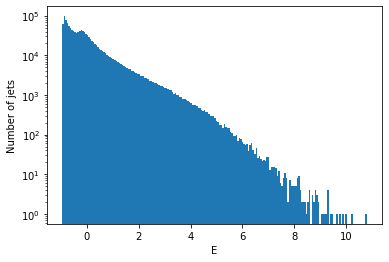

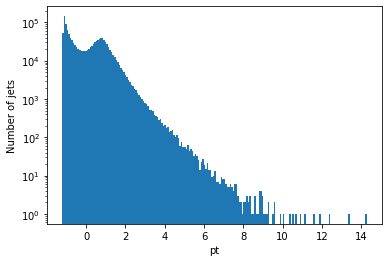

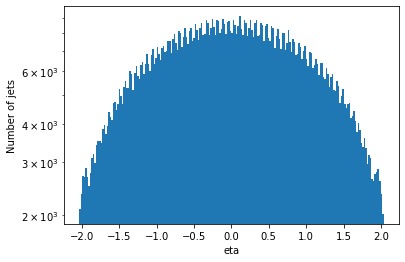

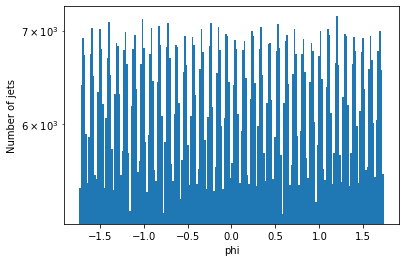

In [12]:
logy = True
plot_all(test, logy)

In [13]:
train_ds = TensorDataset(torch.tensor(train.values, dtype=torch.float), torch.tensor(train.values, dtype=torch.float))
valid_ds = TensorDataset(torch.tensor(test.values, dtype=torch.float), torch.tensor(test.values, dtype=torch.float))

In [14]:
def get_data(train_ds, valid_ds, bs):
    return (
        DataLoader(train_ds, batch_size=bs, shuffle=True),
        DataLoader(valid_ds, batch_size=bs * 2),
    )

In [15]:
train_dl, valid_dl = get_data(train_ds, valid_ds, bs=1024)

In [16]:
db = basic_data.DataBunch(train_dl, valid_dl)

In [17]:
test.shape

(1252371, 4)

In [18]:
nodes = [4, 400, 400, 200, 3, 200, 400, 400, 4]
model = AE_bn_LeakyReLU(nodes)
model.train()

AE_bn_LeakyReLU(
  (encoder): Sequential(
    (0): Linear(in_features=4, out_features=400, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): BatchNorm1d(400, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Linear(in_features=400, out_features=400, bias=True)
    (4): LeakyReLU(negative_slope=0.01)
    (5): BatchNorm1d(400, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Linear(in_features=400, out_features=200, bias=True)
    (7): LeakyReLU(negative_slope=0.01)
    (8): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): Linear(in_features=200, out_features=3, bias=True)
    (10): LeakyReLU(negative_slope=0.01)
    (11): BatchNorm1d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=3, out_features=200, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, t

In [19]:
loss_func = nn.MSELoss()

In [20]:
wd = 1e-2
from fastai.callbacks import ActivationStats
learn = basic_train.Learner(data=db, model=model, wd=wd, loss_func=loss_func, callback_fns=ActivationStats, true_wd=True)

In [21]:
ls models/

best_nn_utils_bs1024_lr1e-04_wd1e-02.pth


In [22]:
learn.load('best_nn_utils_bs1024_lr1e-04_wd1e-02')

Learner(data=DataBunch;

Train: <torch.utils.data.dataset.TensorDataset object at 0x7fafa08ad048>;

Valid: <torch.utils.data.dataset.TensorDataset object at 0x7fafa08adc18>;

Test: None, model=AE_bn_LeakyReLU(
  (encoder): Sequential(
    (0): Linear(in_features=4, out_features=400, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): BatchNorm1d(400, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Linear(in_features=400, out_features=400, bias=True)
    (4): LeakyReLU(negative_slope=0.01)
    (5): BatchNorm1d(400, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Linear(in_features=400, out_features=200, bias=True)
    (7): LeakyReLU(negative_slope=0.01)
    (8): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): Linear(in_features=200, out_features=3, bias=True)
    (10): LeakyReLU(negative_slope=0.01)
    (11): BatchNorm1d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
 

#### Calculate MSE on the test-set

In [23]:
learn.validate()

[0.00019922169]

In [24]:
plt.close('all')
unit_list = ['[GeV]', '[rad]', '[rad]', '[GeV]']
variable_list = [r'$p_T$', r'$\eta$', r'$\phi$', r'$E$']
line_style = ['--', '-']
colors = ['orange', 'c']
markers = ['*', 's']

model.to('cpu')

# Histograms
idxs = (0, 100000)  # Choose events to compare
data = torch.tensor(test[idxs[0]:idxs[1]].values, dtype=torch.float)
pred = model(data)
pred = pred.detach().numpy()
data = data.detach().numpy()

data_df = pd.DataFrame(data, columns=test.columns)
pred_df = pd.DataFrame(pred, columns=test.columns)

# unnormalized_data_df = custom_unnormalize(data_df)
# unnormalized_pred_df = custom_unnormalize(pred_df)

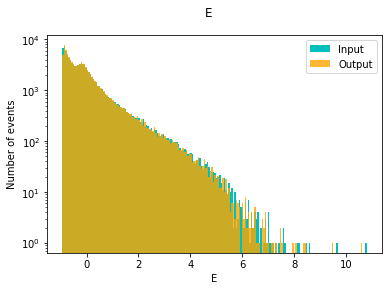

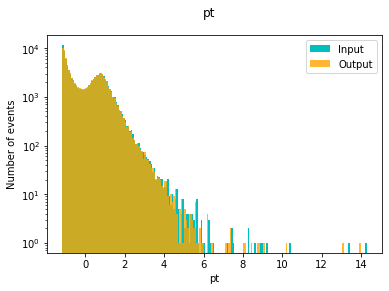

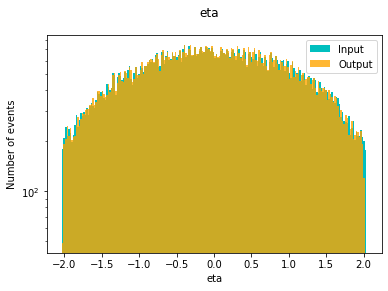

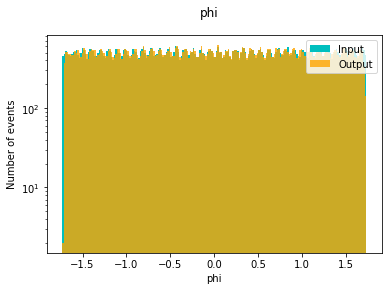

In [25]:
import os
data = data_df.values
pred = pred_df.values

save = True
save_dir = 'AE_PhenoML_4D-3D_400ReLU_BN_MSE_Std-norm_500MB'

if not os.path.exists(save_dir):
    os.makedirs(save_dir)

alph = 0.8
n_bins = 200
for kk in np.arange(4):
    plt.figure()
    n_hist_data, bin_edges, _ = plt.hist(data[:, kk], color=colors[1], label='Input', alpha=1, bins=n_bins)
    n_hist_pred, _, _ = plt.hist(pred[:, kk], color=colors[0], label='Output', alpha=alph, bins=bin_edges)
    plt.suptitle(test.columns[kk])
    plt.xlabel(test.columns[kk])
    plt.ylabel('Number of events')
    # ms.sciy()
    plt.yscale('log')
    if save:
        plt.savefig(os.path.join(save_dir,test.columns[kk]+'.png'))
    plt.legend()

In [26]:
# data = unnormalized_data_df
# pred = unnormalized_pred_df

residuals = (pred_df - data_df)  # / data
# diff = (pred - data)

diff_list = ['phi',
             'eta',
             ]

rel_diff_list = ['E',
                 'pt']

for var in rel_diff_list:
    residuals[var] = residuals[var] / data_df[var]
res_df = pd.DataFrame(residuals, columns=test.columns)


lab_dict = {
    'pt': '$(p_{T,out} - p_{T,in}) / p_{T,in}$',
    'eta': '$\eta_{out} - \eta_{in}$ [rad]',
    'phi': '$\phi_{out} - \phi_{in}$ [rad]',
    'E': '$(E_{out} - E_{in}) / E_{in}$',
}


# Compute correlations
corr = res_df.corr()

In [27]:
residuals['E'][residuals['E'] == -np.inf] = 0
residuals['E'][residuals['E'] == np.inf] = 0

In [28]:
np.sum(data_df['E'] == 0)

0

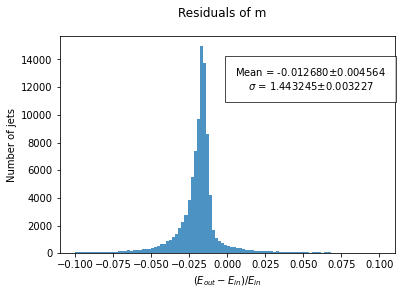

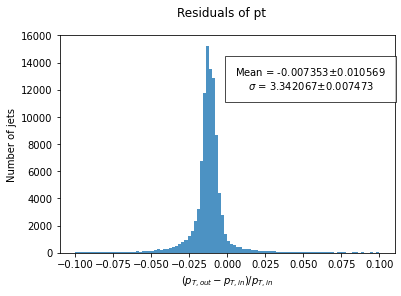

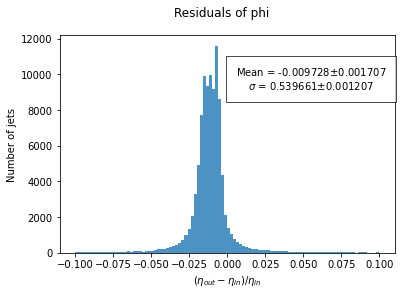

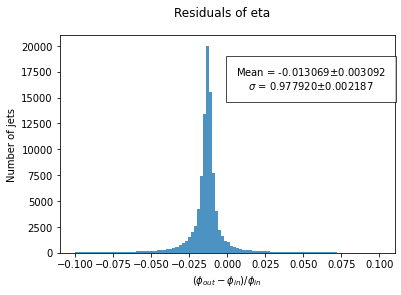

In [29]:
from HEPAutoencoders import utils
from scipy import stats
residual_strings = [r'$(E_{out} - E_{in}) / E_{in}$',
    r'$(p_{T,out} - p_{T,in}) / p_{T,in}$',
                        r'$(\eta_{out} - \eta_{in}) / \eta_{in}$',
                        r'$(\phi_{out} - \phi_{in}) / \phi_{in}$',
                        ]
# residuals = (pred_df - data_df) #/ data
range = (-0.1, 0.1)
# range=None

# indx = data['m']!=0
# data['m'] = data['m'][indx]
# data['m'][np.abs(data['m']) < 1e-3] = 1e-3
# pred['m'] = pred['m'][indx]

r = (pred_df - data_df)
rel_diff_list = ['E',
                 'pt',
                 'eta',
                 'phi']

# r['m'][np.abs(r['m']) < 1e-3] = 1e-3

for var in rel_diff_list:
    r[var] = r[var] / data_df[var]

# residuals['m'][residuals['m'] == -np.inf] = 0
# residuals['m'][residuals['m'] == np.inf] = 0

r = r.values
for kk in np.arange(4):
    plt.figure()
    n_hist_pred, bin_edges, _ = plt.hist(
        r[:, kk], label='Residuals', linestyle=line_style[0], alpha=0.8, bins=100, range=range)
    plt.suptitle('Residuals of %s' % train.columns[kk])
    plt.xlabel(residual_strings[kk])  # (train.columns[kk], train.columns[kk], train.columns[kk]))
    plt.ylabel('Number of jets')
#     ms.sciy()
#     plt.yscale('log')
    std = np.nanstd(r[:, kk])
    std_err = np.nanstd(r[:, kk], ddof=0) / np.sqrt(2 * len(r[:, kk]))
    mean = np.nanmean(r[:, kk])
    sem = stats.sem(r[:, kk], nan_policy='omit')
    ax = plt.gca()
    plt.text(.75, .8, 'Mean = %f$\pm$%f\n$\sigma$ = %f$\pm$%f' % (mean, sem, std, std_err), bbox={'facecolor': 'white', 'alpha': 0.7, 'pad': 10},
             horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=10)
    fig_name = 'Residual_%s' % train.columns[kk]
    plt.savefig(os.path.join(save_dir, fig_name))

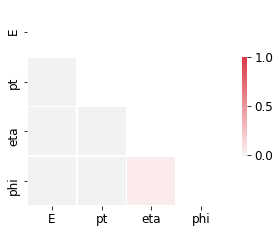

In [30]:
import seaborn as sns

save=True

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# cmap = 'RdBu'
# Plot heatmap
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.subplots_adjust(left=.23, bottom=.30, top=.99, right=.99)
mpl.rc_file('/home/honey/cern/HEPAutoencoders/my_matplotlib_rcparams')
if save:
    fig_name = 'corr_matrix.png'
    plt.savefig(os.path.join(save_dir, fig_name))

if not save:
    plt.show()

In [31]:
del range

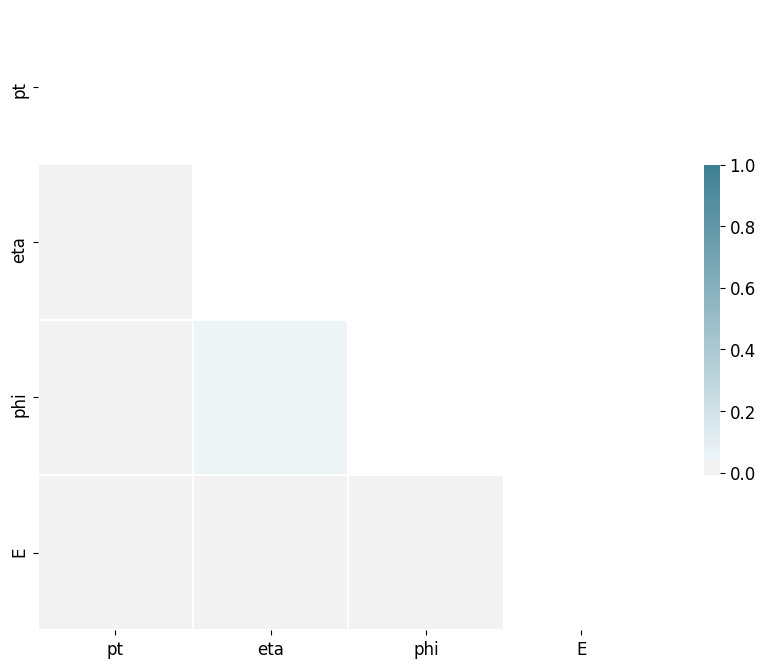

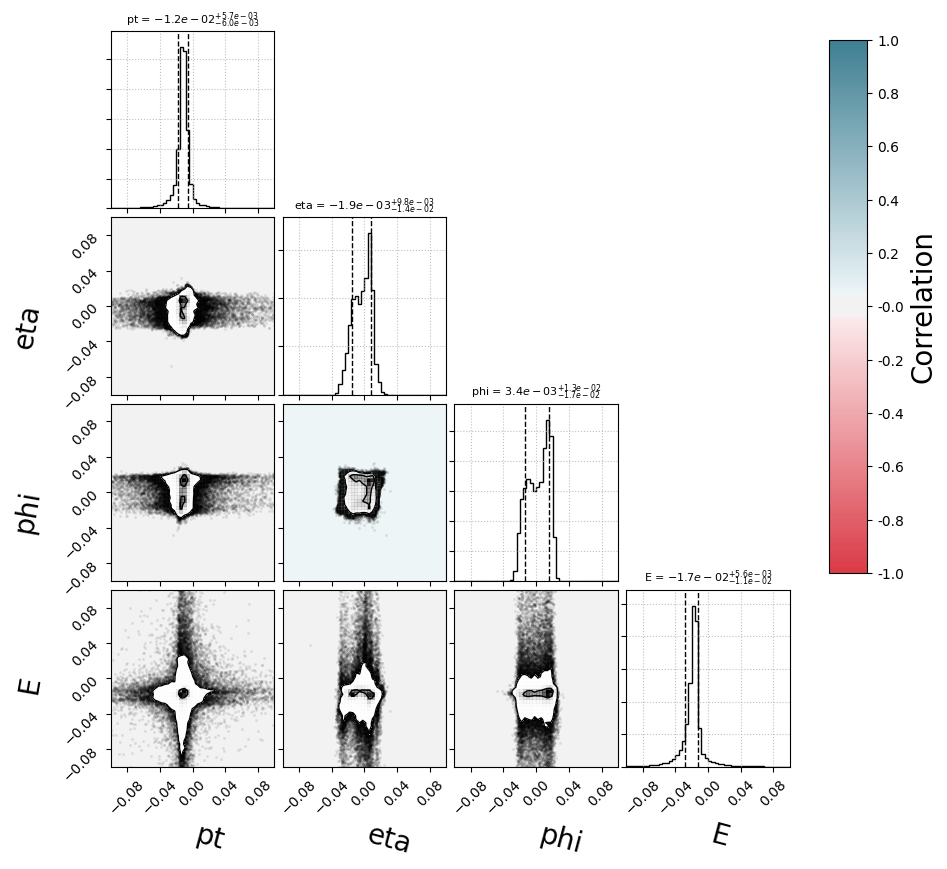

In [33]:
from corner import corner
latent_dim = 20
save = True

corner_groups = [
    ['pt', 'eta', 'phi', 'E']]

for i_group, group in enumerate(corner_groups):
    group_df = residuals[group]
    # Compute correlations
    corr = group_df.corr()

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(10, 220, as_cmap=True)
    norm = mpl.colors.Normalize(vmin=-1, vmax=1, clip=False)
    mappable = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
    # Plot heatmap
    mpl.rcParams['xtick.labelsize'] = 12
    mpl.rcParams['ytick.labelsize'] = 12
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.subplots_adjust(left=.23, bottom=.30, top=.99, right=.99)

    label_kwargs = {'fontsize': 20, 'rotation': -15, 'ha': 'left'}
    title_kwargs = {"fontsize": 8}
    mpl.rcParams['lines.linewidth'] = 1
    mpl.rcParams['xtick.labelsize'] = 10
    mpl.rcParams['ytick.labelsize'] = 10
    group_arr = group_df.values
    qs = np.quantile(group_arr, q=[.0025, .9925], axis=0)
    ndim = qs.shape[1]

    ranges = [tuple(qs[:, kk]) for kk in np.arange(ndim)]
    ranges = [(-0.1, 0.1)]*ndim #Fixed-range
    figure = corner(group_arr, range=ranges, plot_density=True, plot_contours=True, no_fill_contours=False, #range=[range for i in np.arange(ndim)],
                    bins=50, labels=group, label_kwargs=label_kwargs, #truths=[0 for kk in np.arange(qs.shape[1])],
                    show_titles=True, title_kwargs=title_kwargs, quantiles=(0.16, 0.84),
                    levels=(1 - np.exp(-0.5), .90), fill_contours=False, title_fmt='.1e')

    # # Extract the axes
    axes = np.array(figure.axes).reshape((ndim, ndim))
    
    # Loop over the diagonal
    linecol = 'r'
    linstyl = 'dashed'
    for xi in range(ndim):
        ax = axes[0, xi]
        # Set xlabel coords
        ax.xaxis.set_label_coords(.5, -.8)
    for yi in range(ndim):
        ax = axes[yi, 0]
        # Set ylabel coords
        ax.yaxis.set_label_coords(-.4, .5)
        ax.set_ylabel(ax.get_ylabel(), rotation=80, ha='right')
    # Loop over the histograms
    for yi in range(ndim):
        for xi in range(yi):
            ax = axes[yi, xi]
            # Set face color according to correlation
            ax.set_facecolor(color=mappable.to_rgba(corr.values[yi, xi]))
    cax = figure.add_axes([.87, .4, .04, 0.55])
    cbar = plt.colorbar(mappable, cax=cax, format='%.1f', ticks=np.arange(-1., 1.1, 0.2))
    cbar.ax.set_ylabel('Correlation', fontsize=20)

    if i_group == 6:
        plt.subplots_adjust(left=0.13, bottom=0.21, right=.82)
    else:
        plt.subplots_adjust(left=0.13, bottom=0.20, right=.83)
    if save:
        fig_name = 'slide_corner_%d_group%d' % (20, i_group)
        plt.savefig(os.path.join(save_dir, fig_name))

if not save:
    plt.show()